In [1]:
%matplotlib inline

import scipy.optimize
from scipy import constants as c
import numpy as np
import math as m
import sys
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

sys.path.append('C:/Users/Bukacek/scripts')
from LD import LD

folder='C:/Users/Bukacek/OneDrive - UFE/thesis/diplomka/long_range/'
yellow='#ffb200'
red='#DD5544'
blue='#0284C0'

In [2]:
class Permeability():
    def __init__(self):
        f= open('gold_pcgrate.txt', 'r')
        contents=f.readlines()

        self.wavelength=[]
        self.epsilon=[]
        self.real=[]
        self.imag=[]

        for line in contents[:-1]:
            line_split=line.split('\t')
            if 0.3<float(line_split[0])<1.5:
                self.wavelength.append(float(line_split[0])/1e6)
                
                eps=(float(line_split[1])+1j*float(line_split[2]))**2
                self.epsilon.append(eps)
                self.real.append(np.real(eps))
                self.imag.append(np.imag(eps))
        
        k=3
        self.sreal=interp1d(self.wavelength, self.real, kind='linear')
        self.simag=interp1d(self.wavelength, self.imag, kind='linear')

    def eps(self, lm):
        return self.sreal(lm)+1j*self.simag(lm)
metal=Permeability()

In [3]:
def Flong(k1, lm, ep1, ep2, a):
    k0=2*m.pi/lm    
    return k1**2*(1-m.tanh(k1*a)**2*(ep2/ep1)**2)+k0**2*(ep1-ep2)

def Fshort(k1, lm, ep1, ep2, a):
    k0=2*m.pi/lm    
    return k1**2*(1-m.tanh(k1*a)**(-2)*(ep2/ep1)**2)+k0**2*(ep1-ep2)

def long_beta(lm, thickness):
    ep1=metal.eps(lm)
    ep2=1.33**2
    k0=2*m.pi/lm    
    
    FFlong=lambda k1: Flong(k1, lm, ep1, ep2, thickness)

    k1 = scipy.optimize.broyden1(FFlong, 3.5e7, f_tol=1, verbose=False, maxiter=98)
    beta=(k1**2+k0**2*ep1)**0.5
    k2=(beta**2-k0**2*ep2)**0.5

    return beta

def short_beta(lm, thickness):
    ep1=metal.eps(lm)
    ep2=1.33**2
    k0=2*m.pi/lm    
    
    FFshort=lambda k1: Fshort(k1, lm, ep1, ep2, thickness)

    k1 = scipy.optimize.broyden1(FFshort, 3.5e7, f_tol=1, verbose=False, maxiter=98)
    beta=(k1**2+k0**2*ep1)**0.5
    k2=(beta**2-k0**2*ep2)**0.5

    return beta

def long_Lambda(lm, thickness):
    beta=long_beta(lm, thickness)
    return 2*m.pi/np.real(long_beta(lm, thickness))*1e9

def short_Lambda(lm, thickness):
    beta=short_beta(lm, thickness)
    return 2*m.pi/np.real(short_beta(lm, thickness))*1e9

In [15]:
lm=750e-9
d=150e-9

k0=2*m.pi/lm
ep2=1.33**2

In [18]:
2*m.pi/11639590

5.398115661444764e-07

In [17]:
print(long_Lambda(lm, d))
print(short_Lambda(lm, d))
print(long_beta(lm, d))
print('z= {:.3f} um'.format(1/np.real((long_beta(lm, d)**2-k0**2*ep2)**0.5)*1e6))
print('L= {:.3f} um'.format(1/(2*long_beta(lm, d).imag)*1e6))

539.8115205851625
539.8104560593779
(11639590.982364612+39095.60931929612j)
z= 0.297 um
L= 12.789 um


C:\Users\Bukacek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bukacek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [47]:
length_long=[]
length_short=[]
Lm_long=[]
Lm_short=[]
beta_long=[]

a_list=np.linspace(10e-9, 100e-9,90)
lm=650e-9
for aa in a_list:

    beta=long_beta(lm, aa)
    beta_long.append(beta.real)
    length_long.append(1/(2*beta.imag)*1e6)
    Lm_long.append(2*m.pi/beta.real*1e9)
    
    beta=short_beta(lm, aa)
    length_short.append(1/(2*beta.imag)*1e6)
    Lm_short.append(2*m.pi/beta.real*1e9)

C:\Users\Bukacek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bukacek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


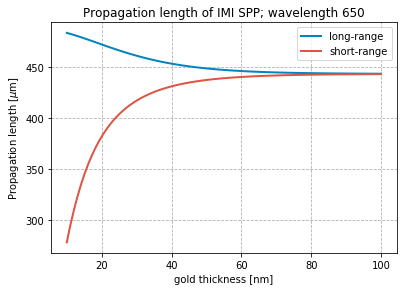

In [48]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.grid(linestyle='--')
axes.set_title('Propagation length of IMI SPP; wavelength '+str(int(lm*1e9)))
axes.set_xlabel('gold thickness [nm]')
axes.set_ylabel('Propagation length [$\\mu$m]')
# axes.set_yscale('log')

name='test_01'
axes.plot(a_list*1e9, Lm_long, color=blue,  linewidth=2, label='long-range')
axes.plot(a_list*1e9, Lm_short, color=red, linewidth=2, label='short-range')

# axes.plot(k_air, omega, color=blue, linewidth=2, label='air')
# axes.plot(k_grating, omega, color=red, linewidth=2, label='grating')

axes.legend(loc=1)
# fig.savefig(folder + 'propagation-length-{}.png'.format(int(lm*1e9)), dpi=300)

C:\Users\Bukacek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bukacek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


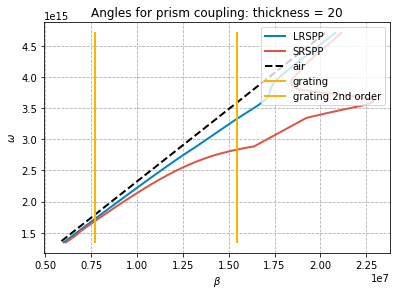

In [49]:
lamda = np.linspace(400E-9, 1400E-9,500)
omega=2*m.pi*c.c/lamda
k_air=omega/c.c*1.29
# k_air=omega/c.c*1.51


beta_long=[]
beta_short=[]

thickness=20e-9

for l in lamda:
    beta_long.append(long_beta(l, thickness))
    beta_short.append(short_beta(l, thickness))

    


ll=407e-9
k_grating=[2*m.pi/ll]*len(lamda)



fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.grid(linestyle='--')
axes.set_title('Angles for prism coupling: thickness = '+str(int(thickness*1e9))+ '')
axes.set_xlabel('$\\beta$')
axes.set_ylabel('$\\omega$')
# axes.set_yscale('log')

name='test_01'
axes.plot(np.real(beta_long), omega, color=blue, linewidth=2, label='LRSPP')
axes.plot(np.real(beta_short), omega, color=red, linewidth=2, label='SRSPP')


axes.plot(k_air, omega, color='black', linewidth=2, linestyle='--', label='air')
axes.plot(k_grating, omega, color=yellow, linewidth=2, label='grating')
axes.plot([0.5*k for k in k_grating], omega, color=yellow, linewidth=2, label='grating 2nd order')

axes.legend(loc=1)
# fig.savefig(folder + 'dispersion-{}.png'.format(int(thickness*1e9)), dpi=300)
